In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [4]:
df = pd.read_csv( 'medical_examination.csv') # ,na_values=['0','2','3']

BMI = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (BMI > 25).astype(int)


In [5]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,0.622086
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,0.484870
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['cholesterol'] = (df['cholesterol']>1).astype(int)
df['gluc'] = (df['gluc']>1).astype(int)


In [7]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


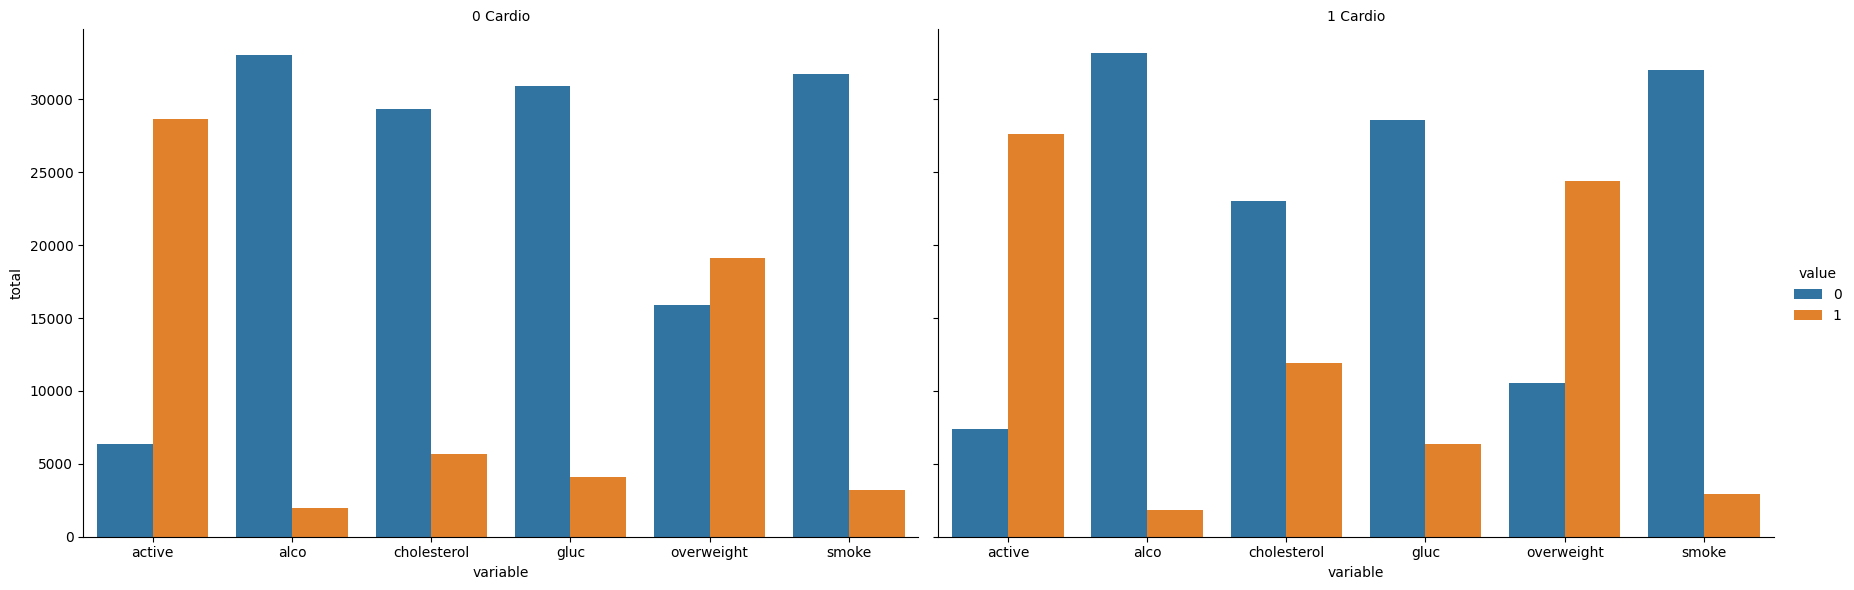

In [ ]:
def draw_cat_plot(df=df):
    df_cat = pd.melt(df,  id_vars=["cardio"],value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size()

# Rename 'size' column to 'total'
    df_cat.rename(columns={'size': 'total'}, inplace=True)
    fig = sns.catplot(
        # figsize=(10, 6),
        data=df_cat,
        x="variable",
        hue="value",
        col="cardio",
        kind="bar",
        y="total",   
        height=6,
        aspect=1.5
    )
    fig.set_axis_labels("variable", "total")
    fig.set_titles("{col_name} Cardio")
    fig.set_xticklabels(['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
      
    return fig.fig

fig = draw_cat_plot()

# df_2.head()



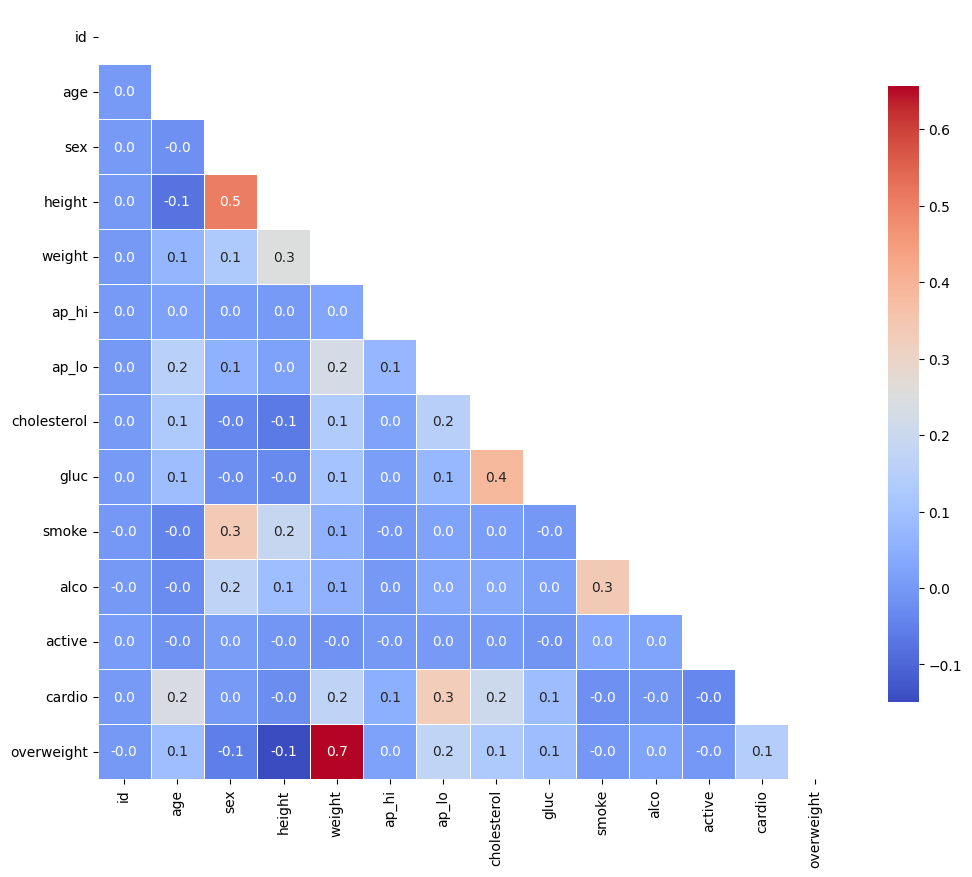

In [11]:
def draw_heat_map(df=df):
    df_heat= df[(df['ap_lo'] <= df['ap_hi'])& (df['height'] >= df['height'].quantile(0.025))& (df['height'] <= df['height'].quantile(0.975))& (df['weight'] >= df['weight'].quantile(0.025))& (df['weight'] <= df['weight'].quantile(0.975))]
    corr = df_heat.corr()
    mask = np.triu ( np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(12, 10))

    sns.heatmap(corr ,mask= mask, cmap= 'coolwarm', annot=True, fmt='.1f', linewidths=0.5, cbar_kws={"shrink": .8})

draw_heat_map()

: 

: 

: 

: 

: 

: 